# What are the main drivers of the level of damage ? 

Prendre en compte le nombre de risque pris en compte ? 

Faire varier le niveau de changement de température ? (Par exemple, RCPX.X ? )

Comment prendre en compte l'équité inter-temporelle : taux d'actualisation

Comment prendre en compte la valeur de la vie ? => indice de GINI inter-national

Comment prendre en compte les inégalités sociales ? 

Prise en compte de phénomènes non-monétaires ? 

Quelle est ma question dans cette partie ? 

### Dans l'article de Gillingham : 

Input : 
- population growth
- GDP growth rate
- climate sensitivity

Output: 
- CO2 concentration
- Temperature
- Output (GDP)
- Output log 
- Emissions
- Population
- Radiative Forcings
- Damages
- SCC

=> moi ce qui m'intéresse en output c'est les domages (niveau, répartition, etc.). Et même ce qui m'intéresse c'est quels inputs font varier le plus ces domages. 

Pour ça, il y a plusieurs choses : 

Des variables en input
La forme des fonctions de dommage
Leur niveau de désagrégation (spatiale, par risque)

Ce à quoi il faut que je réflechisse, c'est comment faire des runs qui permettent de refleter ces différents choix. 

- Equité spatiale : voir si je peux faire varier la variables qui permet de normaliser les dommages selon les régions : compter différements les dommages selon le niveau de vie des régions (aujourd'hui, compté selon le PIB, mais en réalité dégats humains donc on pourrait faire l'hypothèse qu'il faut au contraire multiplier / surpondérer les dommages dans les pays pauvres)
- Equite temporelle : faire une regression avec : plein de runs differents qui simulent plein de chose. on on actualise la valeur totale des dommage de chaque run avec différents taux d'actualisation. On régresse pour voir l'effet que ça a
- Equité sociale ? En gros la même chose mais par décile ? 


## Spatial equity : how to take into account variations on GDP level

### GDP distribution

In [1]:
import pandas as pd
import seaborn as sns
import xarray as xr
import statsmodels.api as sm

In [1]:
from utils.variables import all_variables

ModuleNotFoundError: No module named 'utils'

In [2]:
data = pd.read_csv('../../../gdp_pc.csv', skiprows=4)
data = data[data['2022'] < 100000]
data = data[data['2022'] > 1000]
data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,...,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,...,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620,NaN
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3952.803574,4124.055390,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041,8367.775731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4048.467113,4105.810905,4261.640343,4189.052191,4308.300729,4042.722752,3857.689742,3745.560367,4139.029587,NaN
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3520.782075,3759.472855,4009.353811,4384.188680,4416.029253,4310.934002,5270.550640,5290.977397,5943.125714,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699394,601.599951,642.688431,681.131111,...,6204.929901,5735.066787,6734.475153,7067.724165,6702.526617,5753.066494,7073.612754,6766.481254,6253.161613,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1307.909649,1249.923143,1495.752138,1475.199883,1268.120941,958.264901,1134.713454,1456.901570,1369.129365,NaN


In [3]:
data_clean = data.drop(columns=['Indicator Name', 'Indicator Code', '2023', 'Unnamed: 68'])
data_melted = data_clean.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP_Per_Capita')
data_melted = data_melted[data_melted['GDP_Per_Capita']<75000]
data_melted = data_melted[data_melted['GDP_Per_Capita']>500]
data_melted = data_melted[data_melted['Year'].isin(['1980', '1990', '2000', '2010', '2020'])]
data_melted = data_melted.dropna()

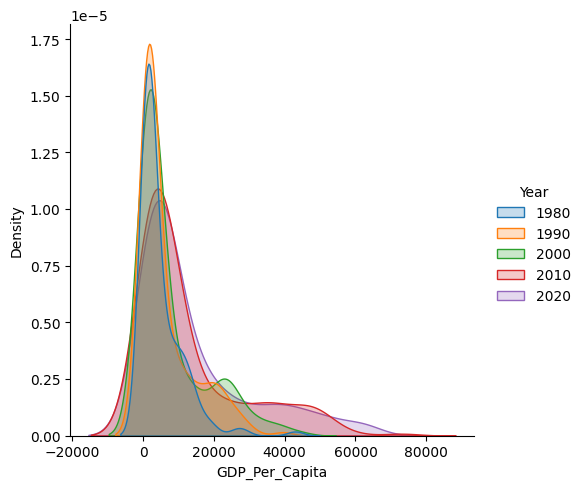

In [4]:
sns.displot(data_melted, x='GDP_Per_Capita', kind='kde', hue='Year',  fill=True)

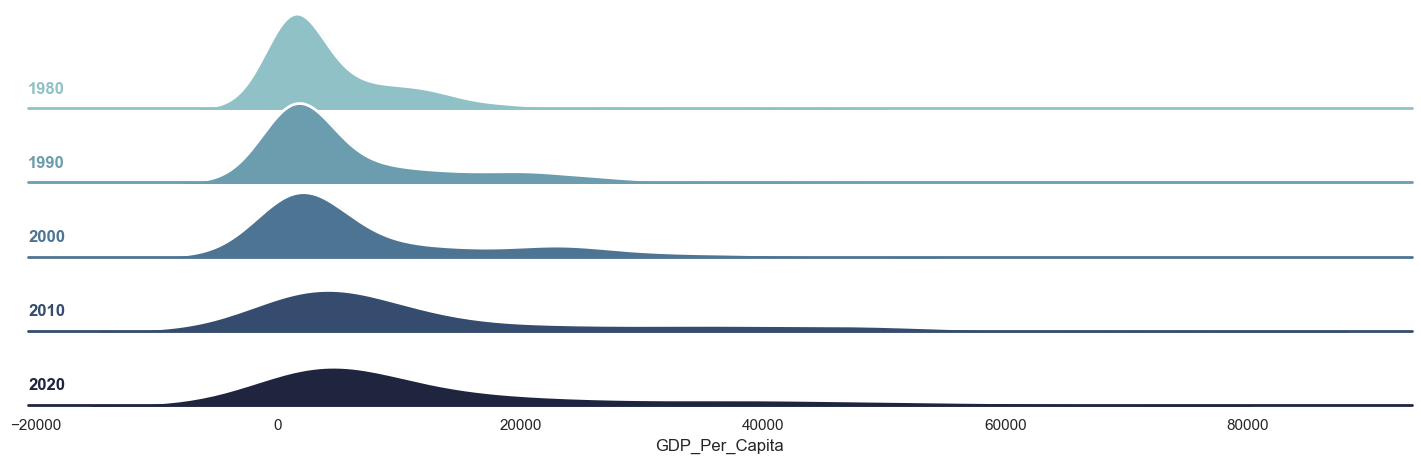

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Supposons que data_melted est déjà chargé et contient les colonnes 'GDP_Per_Capita' et 'Year'
# data_melted = pd.read_csv('votre_fichier.csv')  # Décommentez cette ligne pour charger vos données

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(data_melted['Year'].nunique(), rot=-.25, light=.7)
g = sns.FacetGrid(data_melted, row="Year", hue="Year", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "GDP_Per_Capita",
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "GDP_Per_Capita", clip_on=False, color="w", lw=2, bw_adjust=1)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "GDP_Per_Capita")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()


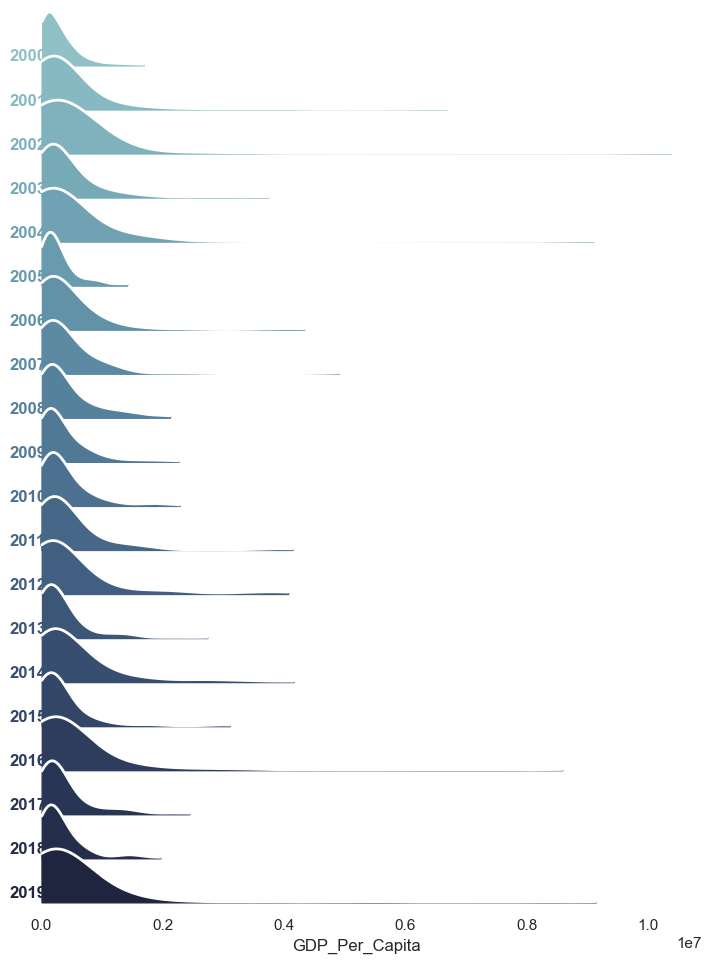

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Exemple de génération de data_melted (remplacez ceci par votre importation de données)
np.random.seed(42)
years = np.repeat(np.arange(2000, 2020), 100)
gdp_per_capita = np.random.lognormal(mean=10, sigma=1, size=2000) * np.tile(np.arange(1, 21), 100)
data_melted = pd.DataFrame({'Year': years, 'GDP_Per_Capita': gdp_per_capita})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(data_melted['Year'].nunique(), rot=-.25, light=.7)
g = sns.FacetGrid(data_melted, row="Year", hue="Year", aspect=15, height=.5, palette=pal)

# Function to compute and plot normalized KDEs
def normalized_kdeplot(x, **kwargs):
    color = kwargs.pop('color')
    kde = gaussian_kde(x, bw_method=0.5)
    x_range = np.linspace(x.min(), x.max(), 1000)
    kde_values = kde(x_range)
    kde_values_normalized = kde_values / kde_values.max()  # Normalization
    plt.fill_between(x_range, kde_values_normalized, color=color, alpha=1)
    plt.plot(x_range, kde_values_normalized, color="w", lw=2)

# Apply the normalized KDE plot function
g.map(normalized_kdeplot, "GDP_Per_Capita")

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "GDP_Per_Capita")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()


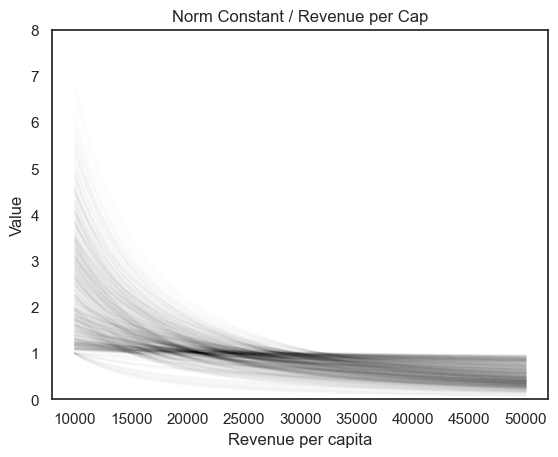

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


norm_constants = np.random.normal(25000, 5000, 25)
revenue_per_cap = np.linspace(10000, 50000, 1000)
exponents = np.random.uniform(0.1, 2, 25)


# Assuming norm_constant and revenue_per_cap are available as variables
for norm_constant in norm_constants: 
    for exponent in exponents: 
        # Calculate the ratio
        normalisation_value = (norm_constant / revenue_per_cap)**exponent

        # Plot the ratio
        sns.lineplot(x=revenue_per_cap, y=normalisation_value, estimator=None, alpha=0.01, color='black')

#plt.plot(x=revenue_per_cap,  y=ratio)


plt.ylim(0, 8)
plt.xlabel('Revenue per capita')
plt.ylabel('Value')
plt.title('Norm Constant / Revenue per Cap')
plt.show()

In [8]:
import pandas as pd
import xarray as xr
import numpy as np

In [9]:
variables = pd.read_csv('../../../variables.csv')
variables_interest = variables[variables['isEquation']==True] # This line excludes variables without EQ
variables_interest.head()

,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,Equation,isEquation
3,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,46,True
8,8,DEFINE: TOT: EQ DEFINE total impact,define_tot_eq_define_total_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,TOT,True
9,9,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,5,True
12,12,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,6,True
16,16,DICE: TOT: EQ DICE total impact,dice_tot_eq_dice_total_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,TOT,True


In [10]:
df_df = pd.read_csv('../../../df_airtable.csv')
df_df['Model'] = df_df['Model - new table'].apply(lambda x: x.split(' ')[0])

variables_interest['Model'] = variables_interest['Model'].str.strip()
variables_interest['Equation'] = variables_interest['Equation'].str.strip()

df_df['Model'] = df_df['Model'].str.strip()
df_df['Equation number'] = df_df['Equation number'].str.strip() 

merged = variables_interest.merge(df_df, left_on=['Model', 'Equation'], right_on=['Model', 'Equation number'], how='left')
merged.head()

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_53436\359772982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Model'] = variables_interest['Model'].str.strip()
C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_53436\359772982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Equation'] = variables_interest['Equation'].str.strip()


,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,...,Equation shape,Formule,Equation form,Zotero reference,IPCC risks,Input categories,Output categories,Latex fragment,Vensim,Vensim name
0,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,DEFINE: TOT: EQ DEFINE total impact,define_tot_eq_define_total_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,5.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l l}{{\ }}&{{\displaystyle=\psi_...,Oui,NaN
3,12,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,6.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l}{{\Lambda({\bf t})\;=\;\theta_...,Oui,NaN
4,16,DICE: TOT: EQ DICE total impact,dice_tot_eq_dice_total_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,NaN,Quadratic,NaN,NaN,NaN,NaN,NaN,Non,NaN


In [11]:
variables_interest_names = variables_interest['Py Name'].values
variables_interest_names = np.concatenate((variables_interest_names, ['time', 'temperature_change', 'total_population']))


In [12]:
total_damage_equations = merged[merged['Equation'].str.strip()=='TOT']
total_damage_equations = total_damage_equations['Py Name'].values


In [13]:
total_damage_equations = variables[variables['Real Name'].str.contains('TOT:')]
total_damage_equations = total_damage_equations['Py Name'].values
total_damage_equations

array(['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact'], dtype=object)

In [14]:
reg_variables = np.concatenate([total_damage_equations, ['time', 'temperature_change', 'total_population', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing']])


In [15]:
ds = xr.open_dataset('../../../results/batch/run_with_1200.nc')
ds

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 2MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            Run: 20,
                                                                            time: 6)
Coordinates: (12/255)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 48B ...
  * Run                                                                    (Run) int32 80B ...
Data variables: (12/171)
    define_46_eq_damage_function                                           (Run, time) float64 960B ...
    define_tot_eq_define_total_impact                                      (Run, time, REGIONS 35 I) float64 34kB ...
    dice_5_eq_damage_function                                              (Run, time) float64 960B ...
    dice_tot_eq_dice_total_impact                                          (Run, time, REGIONS 35 I) float64 34kB ...
    dsk_tot_eq_dsk_total_impact                                            (Run, time, REGIONS 35 I) float64 34kB ...
    extra_extra_gdp_modifyer                                               (Run, time, REGIONS 35 I) float64 34kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  (Run) float64 160B ...
    fund_extra_initial_revenue                                             (Run, REGIONS 35 I) float64 6kB ...
    fund_extra_initial_gdp                                                 (Run, REGIONS 35 I) float64 6kB ...
    fund_extra_initial_population                                          (Run, REGIONS 35 I) float64 6kB ...
    switch_wiliam_amoc_change                                              (Run) float64 160B ...
    witness_epsilon                                                        (Run) float64 160B ...
Attributes:
    description:   Results for simulation run on Thu Jul 11 03:00:03 2024 usi...
    model_file: 

In [16]:
ds = xr.open_dataset('../../../results/batch/run_with_1200.nc')
df = ds[reg_variables].to_dataframe().reset_index()
ds.close()
df

,Run,time,REGIONS 35 I,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_moneraty_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing
0,0,2005.0,AUSTRIA,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,0.000000,0.845000,6.541007e+09,0.092367,20321.524919,1.714491
1,0,2005.0,BELGIUM,2528.626821,3054.585608,0.0,1.379671e+09,5.746519e+06,2.846619e+13,4.973581e+06,5161.276963,0.845000,6.541007e+09,0.092367,20321.524919,1.714491
2,0,2005.0,BULGARIA,10.438947,12.610266,0.0,2.799410e+08,5.009851e+01,3.229255e+08,8.615126e+05,21.307333,0.845000,6.541007e+09,0.092367,20321.524919,1.714491
3,0,2005.0,CROATIA,30.015550,36.258836,0.0,2.565073e+08,2.853332e+01,2.996817e+08,1.519235e+06,61.265887,0.845000,6.541007e+09,0.092367,20321.524919,1.714491
4,0,2005.0,CYPRUS,45.171327,54.567041,0.0,9.993271e+07,5.360278e+05,1.631465e+12,3.055627e+06,92.200923,0.845000,6.541007e+09,0.092367,20321.524919,1.714491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,19,2010.0,INDIA,40.105358,47.997850,0.0,1.186529e+10,8.946122e+03,1.371382e+10,2.179161e+05,81.126241,0.956011,6.914849e+09,-0.166433,34118.248848,1.985985
4196,19,2010.0,LATAM,1717.951828,2056.034332,0.0,1.647699e+10,2.435155e+03,1.946589e+10,1.237100e+06,3475.121022,0.956011,6.914849e+09,-0.166433,34118.248848,1.985985
4197,19,2010.0,RUSSIA,869.437591,1040.537638,0.0,7.563549e+09,1.032690e+03,8.945342e+09,1.345453e+06,1758.722684,0.956011,6.914849e+09,-0.166433,34118.248848,1.985985
4198,19,2010.0,USMCA,235713.955374,282101.032757,0.0,6.834936e+10,3.318339e+03,8.937146e+10,6.379057e+06,476808.783682,0.956011,6.914849e+09,-0.166433,34118.248848,1.985985


In [17]:
df_grouped = df.groupby(['time']).sum().reset_index()
df_grouped=df_grouped.drop(columns=['REGIONS 35 I'])
df_grouped

,time,Run,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,dsk_tot_eq_dsk_total_impact,fund_tot_eq_moneraty_impact,fund_tot_eq_total_deaths,fund_tot_eq_fund_total_impact,fund_tot_total_damage,witness_tot_eq_witness_total_impact,temperature_change,total_population,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing
0,2005.0,6650,5.513931e+06,6.660839e+06,0.0,6.251840e+12,4.094341e+09,1.583571e+16,1.856871e+09,1.125470e+07,591.500000,4.578705e+12,506.267052,1.973554e+07,1200.143665
1,2006.0,6650,5.774059e+06,6.966019e+06,0.0,6.312950e+12,4.191129e+09,1.626259e+16,1.859464e+09,1.177087e+07,604.832239,4.628665e+12,506.267052,1.973554e+07,1238.152815
2,2007.0,6650,6.068678e+06,7.309999e+06,0.0,6.374527e+12,4.299286e+09,1.673293e+16,1.861663e+09,1.235275e+07,619.531640,4.679497e+12,506.267052,1.973554e+07,1276.161964
3,2008.0,6650,6.394196e+06,7.687890e+06,0.0,6.436930e+12,4.416690e+09,1.723869e+16,1.863532e+09,1.299213e+07,635.300966,4.731635e+12,506.267052,1.973554e+07,1314.171114
4,2009.0,6650,6.748127e+06,8.096043e+06,0.0,6.500283e+12,4.541720e+09,1.777355e+16,1.865110e+09,1.368286e+07,651.916101,4.785245e+12,506.267052,1.973554e+07,1352.180263
5,2010.0,6650,7.128817e+06,8.531725e+06,0.0,6.564640e+12,4.673217e+09,1.833292e+16,1.866421e+09,1.442037e+07,669.207703,4.840394e+12,506.267052,1.973554e+07,1390.189413


<Axes: xlabel='time'>

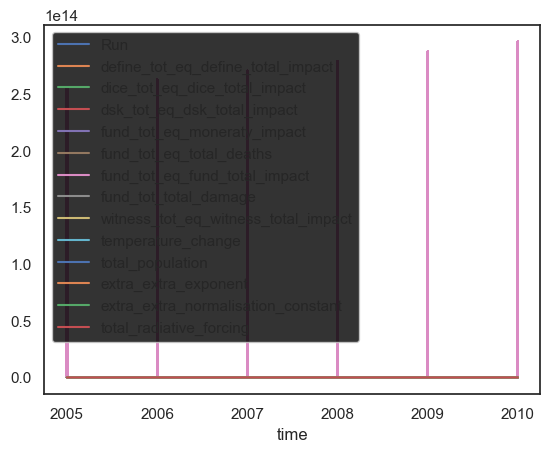

In [18]:
df.plot(x='time')

### Trying to understand why FUND damages are way bigger than the others

In [19]:
fund_damages = variables[(variables['Model']=='FUND') & (variables['isEquation']==True)]
fund_damages_variable_names = fund_damages['Py Name'].values

ds = xr.open_dataset('../../../results/results_run_reference.nc')
fund_damages_values = ds[fund_damages_variable_names].to_dataframe().reset_index()
ds.close()

Plotting all the values

<Axes: xlabel='time'>

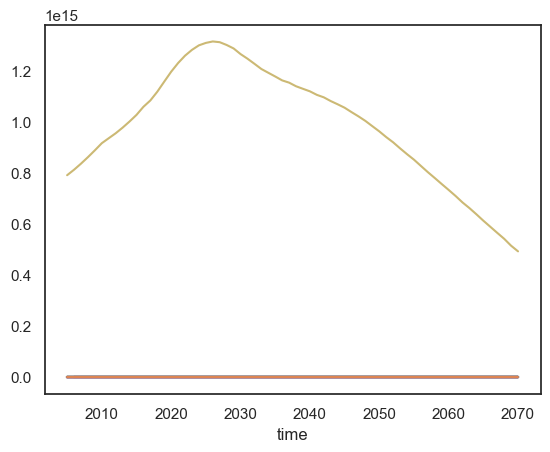

In [20]:
fund_damages_values_grouped = fund_damages_values.groupby(['time']).sum().reset_index()
fund_damages_values_grouped.plot(x='time', legend=False)

Excepting the total

In [21]:
fund_damages_variable_names

array(['fund_a1_eq_total_agricultural_impact',
       'fund_a2_eq_agricultural_impact_of_the_rate_of_climate_change',
       'fund_a3_eq_agricultural_impact_of_the_level_of_climate_change',
       'fund_a4_eq_agricultural_imact_of_the_fertilisation',
       'fund_e1_eq_space_heating',
       'fund_e1_eq_value_of_the_loss_of_the_ecosystems',
       'fund_e2_eq_space_cooling', 'fund_e2_eq_number_of_species',
       'fund_ets1_eq_extratropical_storms',
       'fund_ets2_eq_mortality_from_extratropical_storm',
       'fund_f1_eq_forestry_change_in_consumer_and_producer_surplus',
       'fund_hd1_eq_additional_diarrhoea_deaths',
       'fund_hv_eq_vectorborn_diseases',
       'fund_mm1_eq_value_of_a_statistical_life',
       'fund_mm2_eq_value_of_a_year_of_morbidity', 'fund_slr10_eq_npvvp',
       'fund_slr11_eq_npvvw', 'fund_slr12_eq_npvvd',
       'fund_slr1_eq_slr_dryland_loss',
       'fund_slr2_eq_potential_dryland_loss',
       'fund_slr3_eq_actual_dryland_loss',
       'fund_slr4_eq_

<Axes: xlabel='time'>

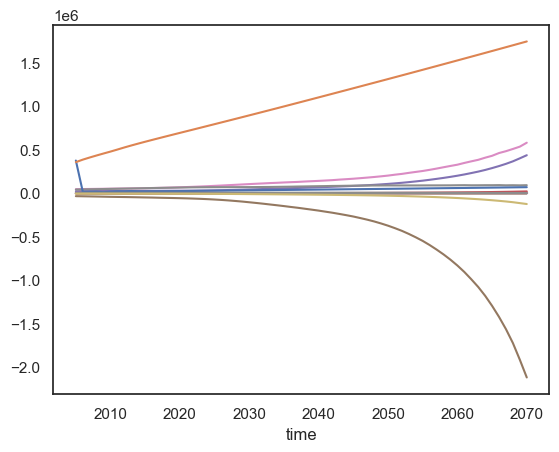

In [22]:
primary_dropped = ['fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths', 'fund_tot_eq_fund_total_impact', 'REGIONS 35 I']
secondary_dropped = ['fund_slr3_eq_actual_dryland_loss', 'fund_slr4_eq_actual_cumulative_dryland_lost', 'fund_slr11_eq_npvvw', 'fund_slr12_eq_npvvd']
thirdly_dropped = ['fund_e1_eq_value_of_the_loss_of_the_ecosystems', 'fund_mm1_eq_value_of_a_statistical_life', 'fund_hd1_eq_additional_diarrhoea_deaths', 'fund_slr8_eq_wetland_value', 'fund_mm2_eq_value_of_a_year_of_morbidity', 'fund_e2_eq_number_of_species']

dropped = primary_dropped + secondary_dropped + thirdly_dropped 

fund_damages_values_grouped_intermediate = fund_damages_values_grouped.drop(columns=dropped)
fund_damages_values_grouped_intermediate.plot(x='time', legend=False)

In [23]:
fund_damages_values_grouped_intermediate_melted = fund_damages_values_grouped_intermediate.melt(id_vars=['time'], var_name='variable', value_name='value')
fund_damages_values_grouped_intermediate_melted.sort_values(by='value', inplace=True)
fund_damages_values_grouped_intermediate_melted.groupby('variable').max().sort_values(by='value', ascending=False)

,time,value
variable,,
fund_slr1_eq_slr_dryland_loss,2070.0,1.745869e+06
fund_ets1_eq_extratropical_storms,2070.0,5.811189e+05
fund_e1_eq_space_heating,2070.0,4.372159e+05
fund_slr10_eq_npvvp,2070.0,3.758668e+05
fund_slr2_eq_potential_dryland_loss,2070.0,3.575806e+05
fund_ets2_eq_mortality_from_extratropical_storm,2070.0,9.309168e+04
fund_slr5_eq_dryland_value,2070.0,2.083734e+04
fund_a4_eq_agricultural_imact_of_the_fertilisation,2070.0,2.775501e+02
fund_a1_eq_total_agricultural_impact,2070.0,2.707577e+02


In [24]:
#df_grouped_no_fund = df_grouped.drop(columns=['fund_tot_eq_fund_total_impact', 'fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths', 'fund_tot_total_damage', 'dsk_tot_eq_dsk_total_impact'])
#df_grouped_no_fund.plot(x='time')

In [25]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I'], var_name='equation',  value_vars=total_damage_equations, value_name='total_damage')
df_melted

,time,REGIONS 35 I,equation,total_damage
0,2005.0,AUSTRIA,define_tot_eq_define_total_impact,0.000000
1,2005.0,BELGIUM,define_tot_eq_define_total_impact,2528.626821
2,2005.0,BULGARIA,define_tot_eq_define_total_impact,10.438947
3,2005.0,CROATIA,define_tot_eq_define_total_impact,30.015550
4,2005.0,CYPRUS,define_tot_eq_define_total_impact,45.171327
...,...,...,...,...
33595,2010.0,INDIA,witness_tot_eq_witness_total_impact,81.126241
33596,2010.0,LATAM,witness_tot_eq_witness_total_impact,3475.121022
33597,2010.0,RUSSIA,witness_tot_eq_witness_total_impact,1758.722684
33598,2010.0,USMCA,witness_tot_eq_witness_total_impact,476808.783682


Equation form represents the shape of the equation. Subscripts represents the level of spatial agregation (by region or global). Number of equation represents the complexity of the model. 

In [26]:
equation_shape = merged[['Py Name', 'Equation form', 'Subscripts']]
equation_shape.head()

,Py Name,Equation form,Subscripts
0,define_46_eq_damage_function,NaN,NaN
1,define_tot_eq_define_total_impact,NaN,['REGIONS 35 I']
2,dice_5_eq_damage_function,Quadratic,NaN
3,dice_6_eq_abatment_function,Quadratic,NaN
4,dice_tot_eq_dice_total_impact,Quadratic,['REGIONS 35 I']


In [27]:
data = df_melted.merge(equation_shape, left_on='equation', right_on='Py Name', how='left')
data = data.drop(columns=['Py Name'])
data['Equation form'] = data['Equation form'].fillna('Exponential')
data['Subscripts'] = data['Subscripts'].fillna('None')
data = data.dropna()
data

,time,REGIONS 35 I,equation,total_damage,Equation form,Subscripts
0,2005.0,AUSTRIA,define_tot_eq_define_total_impact,0.000000,Exponential,['REGIONS 35 I']
1,2005.0,BELGIUM,define_tot_eq_define_total_impact,2528.626821,Exponential,['REGIONS 35 I']
2,2005.0,BULGARIA,define_tot_eq_define_total_impact,10.438947,Exponential,['REGIONS 35 I']
3,2005.0,CROATIA,define_tot_eq_define_total_impact,30.015550,Exponential,['REGIONS 35 I']
4,2005.0,CYPRUS,define_tot_eq_define_total_impact,45.171327,Exponential,['REGIONS 35 I']
...,...,...,...,...,...,...
33595,2010.0,INDIA,witness_tot_eq_witness_total_impact,81.126241,Probabilistic,['REGIONS 35 I']
33596,2010.0,LATAM,witness_tot_eq_witness_total_impact,3475.121022,Probabilistic,['REGIONS 35 I']
33597,2010.0,RUSSIA,witness_tot_eq_witness_total_impact,1758.722684,Probabilistic,['REGIONS 35 I']
33598,2010.0,USMCA,witness_tot_eq_witness_total_impact,476808.783682,Probabilistic,['REGIONS 35 I']


In [28]:
import statsmodels.api as sm

# Variables à ajouter : 

dummy_variables = ['Equation form', 'Subscripts']
drop_columns = data.columns.difference(dummy_variables)

df_regression = data.copy()
df_regression = pd.get_dummies(df_regression, columns=dummy_variables, drop_first=True)

y = df_regression['total_damage']
X = df_regression.drop(columns=drop_columns, axis=1)

X = sm.add_constant(X)

X = X.astype(float)
y = y.astype(float)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     261.0
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          3.54e-274
Time:                        13:20:31   Log-Likelihood:            -9.8806e+05
No. Observations:               30720   AIC:                         1.976e+06
Df Residuals:                   30714   BIC:                         1.976e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        9.791e+12   5.61e+11     17.458      0.000    8.69e+12    1.09e+13
Equation form_Exponential   -9.791e+12   4.11e+11    -23.814      0.000   -1.06e+13   -8.98e+12
Equation form_Inverse cubic -9.791e+12   4.11e+11    -23.814      0.000   -1.06e+13   -8.98e+12
Equation form_Probabilistic -9.791e+12   4.11e+11    -23.814      0.000   -1.06e+13   -8.98e+12
Equation form_Quadratic     -9.791e+12   4.11e+11    -23.814      0.000   -1.06e+13   -8.98e+12
Subscripts_['REGIONS 35 I'] -3.202e+06   5.16e+11  -6.21e-06      1.000   -1.01e+12    1.01e+12
==============================================================================
Omnibus:                    45578.721   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12745151.874
Skew:                           9.396   Prob(JB):                         0.00
Kurtosis:                     101.000   Cond. No.                         8.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question de recherche : Quels sont les principaux déterminants du niveau de dommage produit par une fonction de dommage (et son corrolaire, à quel point une fonction de dommage est sensible à ces hypothèses)

Donc si je veux faire une régression, la variable expliquée est le niveau de dommage. Ce doit toujours être la même, qui pourrait s'appeler "Dommage" par exemple. 

Les variables explicatives sont : 
- le modèle (FUND, DICE, etc)
- le type de fonction (quadratique, linéaire, etc)
- le nombre d'équation ? 
- le nombre de variables / secteurs couverts ? 
- le niveau d'aggrégation spatiale ? 
- un proxy du taux d'actualisation ? 


Je cherche donc à avoir un tableau de données qui ressemble à ça : 

| Niveau de dommage | Modèle | Type de fonction | Nombre d'équations |
|-------------------|--------|------------------|--------------------|
| 1567522767826      |   FUND     |         Elasticité         |      12              |
| 387974089787                  |    DICE    |     Quadratique             |  1                  |
|                   |        |                  |                    |
|                   |        |                  |                    |

ValueError: Could not interpret value `total_population` for `x`. An entry with this name does not appear in `data`.

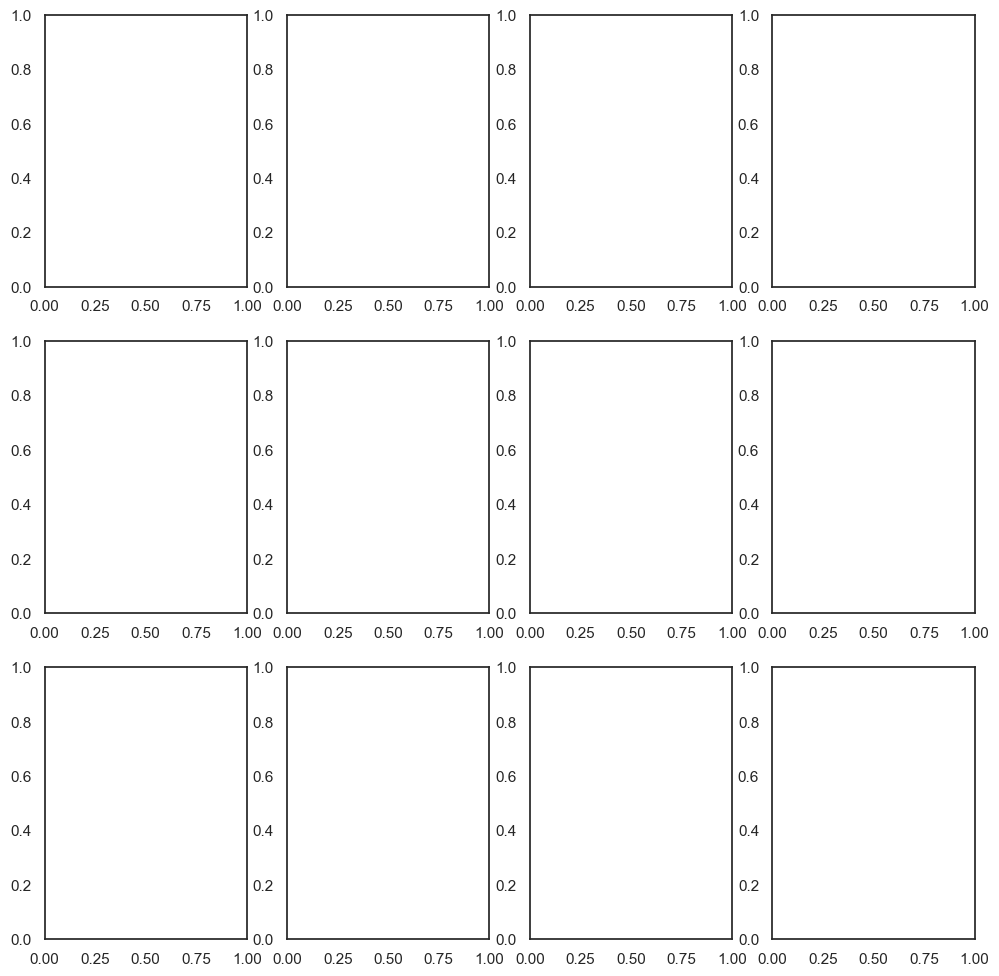

In [29]:
import matplotlib.pyplot as plt

# Define the drivers and models
drivers = ['total_population', 'temperature_change', 'gini_gdppc_eu27', 'time']
models = ['Model 1', 'Model 2', 'Model 3']

# Create the figure and subplots
fig, axs = plt.subplots( len(models), len(drivers), figsize=(12, 12))



# Loop through each subplot

for j, driver in enumerate(drivers):
    for i, model in enumerate(models):
        
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, ax=axs[i, j], hue='REGIONS 35 I', palette=['lightgrey']*len(data['REGIONS 35 I'].unique()), legend=False)
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, color='grey', linewidth=2, ax=axs[i, j], estimator='mean')

        # Set the title and labels for the current subplot
        #axs[i, j].set_title(f'{driver}')
        axs[i, j].set_xlabel(driver)
        axs[i, j].set_ylabel(f'Total Damage in {model}')

# Adjust the spacing between subplots
plt.tight_layout()
#plt.title('Damage drivers in different models')

# Show the figure
plt.show()

## Trying the regression when varying the normalisation factor

In [ ]:
import xarray as xr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns



ds = xr.open_dataset('../../../results/batch/run_with_1200.nc')

dim = ['Run']

ds_mean = ds.mean()
ds_std = ds.std()

ds_normalized = (ds - ds_mean) / ds_std

df = ds_normalized[reg_variables].to_dataframe().reset_index()


ds.close()


c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib

In [ ]:
df

# drop columns 
to_drop = ['fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths', 'fund_tot_eq_fund_total_impact']
df = df.drop(columns=['fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths', 'fund_tot_eq_fund_total_impact'])
total_damage_equations = list(total_damage_equations.flatten())
total_damage_equations = [x for x in total_damage_equations if x not in to_drop]

In [ ]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing'], var_name='equation',  value_vars=total_damage_equations, value_name='total_damage')
df_melted = df_melted.dropna(axis=0)

df_melted["total_damage"] = df_melted["total_damage"].astype(float)
df_melted

,time,REGIONS 35 I,extra_extra_exponent,extra_extra_normalisation_constant,total_radiative_forcing,equation,total_damage
0,2005.0,AUSTRIA,-0.326683,-0.630967,-1.46385,define_tot_eq_define_total_impact,-0.257404
1,2005.0,BELGIUM,-0.326683,-0.630967,-1.46385,define_tot_eq_define_total_impact,-0.184754
2,2005.0,BULGARIA,-0.326683,-0.630967,-1.46385,define_tot_eq_define_total_impact,-0.257105
3,2005.0,CROATIA,-0.326683,-0.630967,-1.46385,define_tot_eq_define_total_impact,-0.256542
4,2005.0,CYPRUS,-0.326683,-0.630967,-1.46385,define_tot_eq_define_total_impact,-0.256107
...,...,...,...,...,...,...,...
20995,2010.0,INDIA,-0.460697,0.474873,1.46385,witness_tot_eq_witness_total_impact,-0.256331
20996,2010.0,LATAM,-0.460697,0.474873,1.46385,witness_tot_eq_witness_total_impact,-0.208337
20997,2010.0,RUSSIA,-0.460697,0.474873,1.46385,witness_tot_eq_witness_total_impact,-0.232608
20998,2010.0,USMCA,-0.460697,0.474873,1.46385,witness_tot_eq_witness_total_impact,6.485031


<Axes: xlabel='time', ylabel='total_damage'>

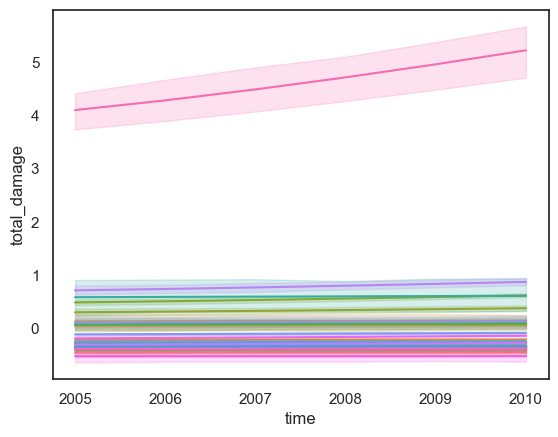

In [ ]:
sns.lineplot(x='time', y='total_damage', data=df_melted, hue="REGIONS 35 I", estimator='mean', legend=False)

In [ ]:
df_regression = df_melted.groupby(['time', 'equation', 'extra_extra_exponent', 'extra_extra_normalisation_constant', 'total_radiative_forcing']).sum().reset_index()
df_regression = pd.get_dummies(df_regression, columns=['equation'], drop_first=True)
df_regression = df_regression.dropna()

y = df_regression['total_damage']
X = df_regression.drop(columns=['total_damage', 'REGIONS 35 I'], axis=1)

X = sm.add_constant(X)

X = X.astype(float)
y = y.astype(float)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     297.5
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          4.93e-157
Time:                        10:29:50   Log-Likelihood:                -116.24
No. Observations:                 480   AIC:                             246.5
Df Residuals:                     473   BIC:                             275.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.0005   1.21e-05    -42.251      0.000      -0.001      -0.000
time                                          2.538e-07   1.41e-05      0.018      0.986   -2.75e-05     2.8e-05
extra_extra_exponent                          6.438e-17      0.014   4.49e-15      1.000      -0.028       0.028
extra_extra_normalisation_constant            3.877e-17      0.014   2.71e-15      1.000      -0.028       0.028
total_radiative_forcing                          0.5989      0.014     42.251      0.000       0.571       0.627
equation_dice_tot_eq_dice_total_impact       -1.572e-15      0.040  -3.92e-14      1.000      -0.079       0.079
equation_fund_tot_total_damage               -2.345e-15      0.040  -5.85e-14      1.000      -0.079       0.079
equation_witness_tot_eq_witness_total_impact -1.374e-15      0.040  -3.43e-14      1.000      -0.079       0.079
==============================================================================
Omnibus:                       10.042   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.205
Skew:                           0.050   Prob(JB):                     0.000184
Kurtosis:                       3.922   Cond. No.                     9.89e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: xlabel='norm_constant', ylabel='total_damage'>

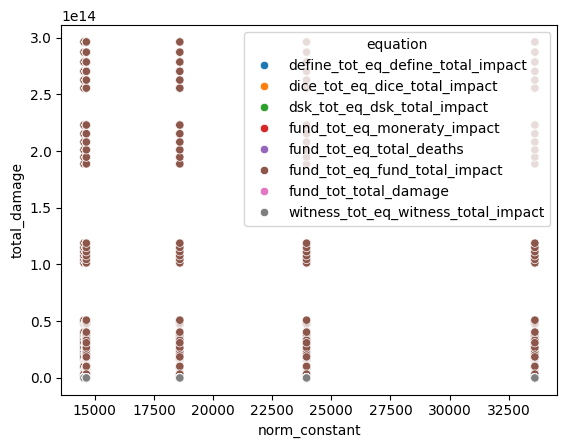

In [ ]:
sns.scatterplot(data=df_melted, x='norm_constant', y='total_damage', hue='equation')

In [ ]:
reg_variables

array(['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact', 'dsk_tot_eq_dsk_total_impact',
       'fund_tot_eq_moneraty_impact', 'fund_tot_eq_total_deaths',
       'fund_tot_eq_fund_total_impact', 'fund_tot_total_damage',
       'witness_tot_eq_witness_total_impact', 'time',
       'temperature_change', 'total_population', 'extra_extra_exponent',
       'extra_extra_normalisation_constant', 'total_radiative_forcing'],
      dtype=object)

In [ ]:
ds = xr.open_dataset('../../../results/batch/run_ds.nc')
ds

<xarray.Dataset> Size: 1MB
Dimensions:                                                                (
                                                                            A MATRIX YEARS I: 15,
                                                                            AEZ I: 4,
                                                                            AGE ADULTS I: 10,
                                                                            AGE CHAIN I: 16,
                                                                            AGE CHAIN MIDDLE I: 15,
                                                                            ...
                                                                            VINTAGING ANNUAL: 10,
                                                                            bottom: 1,
                                                                            lower: 3,
                                                                            pprofile: 4,
                                                                            upper: 3,
                                                                            time: 46)
Coordinates: (12/254)
  * A MATRIX YEARS I                                                       (A MATRIX YEARS I) <U8 480B ...
  * AEZ I                                                                  (AEZ I) <U13 208B ...
  * AGE ADULTS I                                                           (AGE ADULTS I) <U6 240B ...
  * AGE CHAIN I                                                            (AGE CHAIN I) <U7 448B ...
  * AGE CHAIN MIDDLE I                                                     (AGE CHAIN MIDDLE I) <U6 360B ...
  * AGE CHAIN YOUNG I                                                      (AGE CHAIN YOUNG I) <U6 360B ...
    ...                                                                     ...
  * VINTAGING ANNUAL                                                       (VINTAGING ANNUAL) <U3 120B ...
  * bottom                                                                 (bottom) <U6 24B ...
  * lower                                                                  (lower) <U6 72B ...
  * pprofile                                                               (pprofile) <U9 144B ...
  * upper                                                                  (upper) <U6 72B ...
  * time                                                                   (time) float64 368B ...
Data variables: (12/171)
    define_46_eq_damage_function                                           (time) float64 368B ...
    define_tot_eq_define_total_impact                                      (time, REGIONS 35 I) float64 13kB ...
    dice_5_eq_damage_function                                              (time) float64 368B ...
    dice_tot_eq_dice_total_impact                                          (time, REGIONS 35 I) float64 13kB ...
    dsk_tot_eq_dsk_total_impact                                            (time, REGIONS 35 I) float64 13kB ...
    extra_extra_gdp_modifyer                                               (time, REGIONS 35 I) float64 13kB ...
    ...                                                                     ...
    fund_w1_tau_parameter                                                  float64 8B ...
    fund_extra_initial_revenue                                             (REGIONS 35 I) float64 280B ...
    fund_extra_initial_gdp                                                 (REGIONS 35 I) float64 280B ...
    fund_extra_initial_population                                          (REGIONS 35 I) float64 280B ...
    switch_wiliam_amoc_change                                              float64 8B ...
    witness_epsilon                                                        float64 8B ...
Attributes:
    description:   Results for simulation run on Mon Jul 15 05:54:19 2024 usi...
    model_file:    WILIAM\WILIAM.py
    timestep:      

In [ ]:
df = ds[reg_variables].to_dataframe().reset_index()

In [ ]:
df["fund_tot_eq_moneraty_impact"] = df["fund_tot_eq_moneraty_impact"] / 1e12

<Axes: xlabel='time', ylabel='fund_tot_eq_moneraty_impact'>

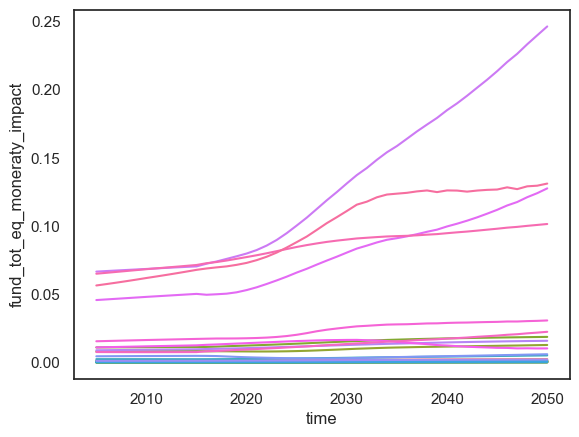

In [ ]:
sns.lineplot(x='time', y='fund_tot_eq_moneraty_impact', data=df, hue='REGIONS 35 I', estimator='mean', legend=False)